In [40]:
# References
# Ablone dataset 
# https://archive.ics.uci.edu/ml/datasets/abalone

# tools used 
# pandas, seaborn, sklearn all MIT licences

In [41]:
# imports

import pandas as pd
import seaborn as sns

## Download the dataset of interest and view it

In [42]:

# reading csv files
data =  pd.read_csv("C:\\Users\\ThomasEvans\\Desktop\\Training\\abalone.data", sep=",")
print(data)

      M  0.455  0.365  0.095   0.514  0.2245   0.101    0.15  15
0     M  0.350  0.265  0.090  0.2255  0.0995  0.0485  0.0700   7
1     F  0.530  0.420  0.135  0.6770  0.2565  0.1415  0.2100   9
2     M  0.440  0.365  0.125  0.5160  0.2155  0.1140  0.1550  10
3     I  0.330  0.255  0.080  0.2050  0.0895  0.0395  0.0550   7
4     I  0.425  0.300  0.095  0.3515  0.1410  0.0775  0.1200   8
...  ..    ...    ...    ...     ...     ...     ...     ...  ..
4171  F  0.565  0.450  0.165  0.8870  0.3700  0.2390  0.2490  11
4172  M  0.590  0.440  0.135  0.9660  0.4390  0.2145  0.2605  10
4173  M  0.600  0.475  0.205  1.1760  0.5255  0.2875  0.3080   9
4174  F  0.625  0.485  0.150  1.0945  0.5310  0.2610  0.2960  10
4175  M  0.710  0.555  0.195  1.9485  0.9455  0.3765  0.4950  12

[4176 rows x 9 columns]


In [43]:
# aas it does nto ahve headings we add them here
data.columns =['sex', 'Length', 'diam', 'Height', 'Whole', 'Shucked', 'Viscera', 'Shell', 'Rings']
  
# displaying the DataFrame
print(data)

     sex  Length   diam  Height   Whole  Shucked  Viscera   Shell  Rings
0      M   0.350  0.265   0.090  0.2255   0.0995   0.0485  0.0700      7
1      F   0.530  0.420   0.135  0.6770   0.2565   0.1415  0.2100      9
2      M   0.440  0.365   0.125  0.5160   0.2155   0.1140  0.1550     10
3      I   0.330  0.255   0.080  0.2050   0.0895   0.0395  0.0550      7
4      I   0.425  0.300   0.095  0.3515   0.1410   0.0775  0.1200      8
...   ..     ...    ...     ...     ...      ...      ...     ...    ...
4171   F   0.565  0.450   0.165  0.8870   0.3700   0.2390  0.2490     11
4172   M   0.590  0.440   0.135  0.9660   0.4390   0.2145  0.2605     10
4173   M   0.600  0.475   0.205  1.1760   0.5255   0.2875  0.3080      9
4174   F   0.625  0.485   0.150  1.0945   0.5310   0.2610  0.2960     10
4175   M   0.710  0.555   0.195  1.9485   0.9455   0.3765  0.4950     12

[4176 rows x 9 columns]


## Summarising the Data and Exploring the Values

In [44]:
def data_frame_explorer(data_frame):
    """ Funciton used to take in a data frame and run some diagnostis
    we start by printig data types and summary statistics, then we assess missing data,
    we make this  afunction as it might be usefull later"""
    
    print(data_frame.info())
    print(data_frame.describe())
    # Remove strings as this will break the below operation
    data_excluding_strings = data_frame.select_dtypes(exclude=['object'])
    print("Skew of Columns")
    print(data_excluding_strings.skew())
    # skewness along the index axis
    


In [45]:
data_frame_explorer(data)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4176 entries, 0 to 4175
Data columns (total 9 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   sex      4176 non-null   object 
 1   Length   4176 non-null   float64
 2   diam     4176 non-null   float64
 3   Height   4176 non-null   float64
 4   Whole    4176 non-null   float64
 5   Shucked  4176 non-null   float64
 6   Viscera  4176 non-null   float64
 7   Shell    4176 non-null   float64
 8   Rings    4176 non-null   int64  
dtypes: float64(7), int64(1), object(1)
memory usage: 293.8+ KB
None
            Length         diam       Height        Whole     Shucked  \
count  4176.000000  4176.000000  4176.000000  4176.000000  4176.00000   
mean      0.524009     0.407892     0.139527     0.828818     0.35940   
std       0.120103     0.099250     0.041826     0.490424     0.22198   
min       0.075000     0.055000     0.000000     0.002000     0.00100   
25%       0.450000     0.350000     0.1150

## From the above we can tell that the data is nice and complete, there is no missing data, however some values have a fairly high skew so transforming them might be a good option. 

## In general the closer the skew is to 0, the more normal the distribution. Height has a skew of 3.1, indicating the distribution is right skew with a large positive tail.

## We further explore the disributions via visualisations below.

array([[<AxesSubplot:title={'center':'Length'}>,
        <AxesSubplot:title={'center':'diam'}>,
        <AxesSubplot:title={'center':'Height'}>,
        <AxesSubplot:title={'center':'Whole'}>],
       [<AxesSubplot:title={'center':'Shucked'}>,
        <AxesSubplot:title={'center':'Viscera'}>,
        <AxesSubplot:title={'center':'Shell'}>,
        <AxesSubplot:title={'center':'Rings'}>]], dtype=object)

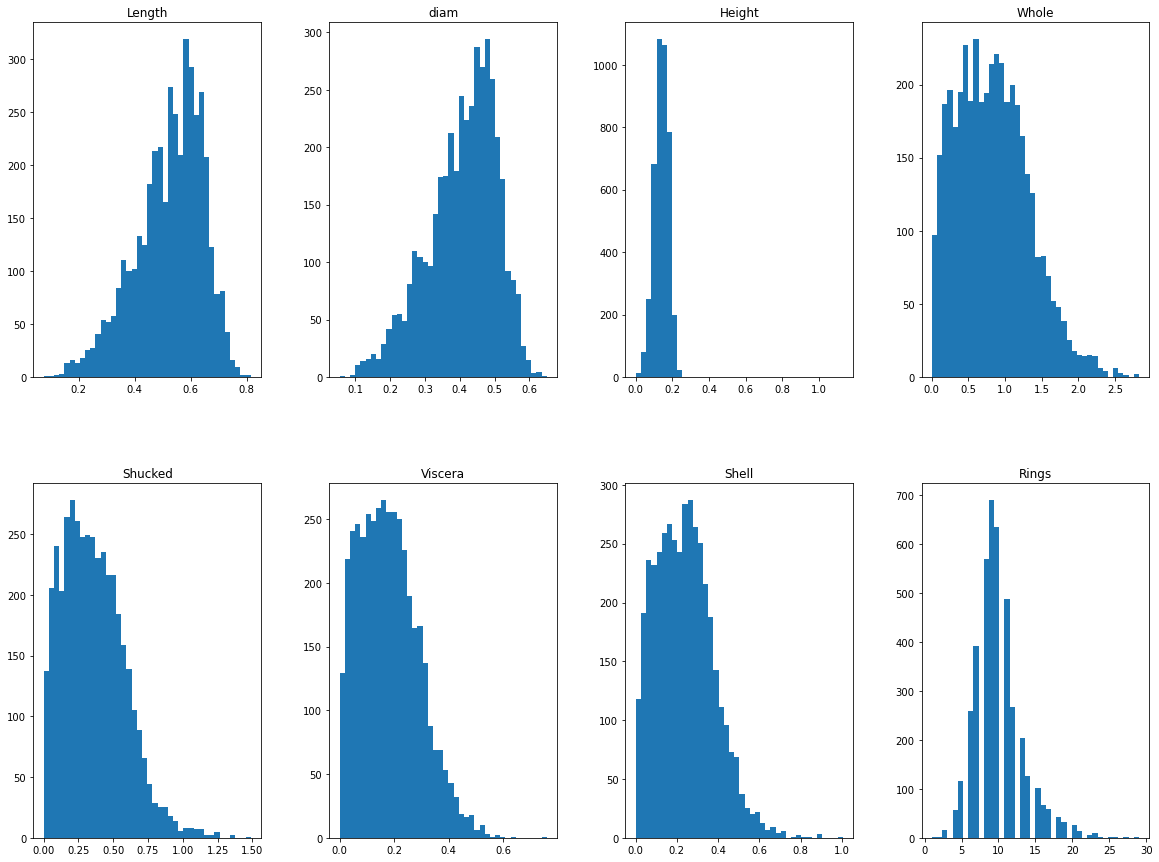

In [52]:
data.hist(figsize=(20,15), grid=False, layout=(2, 4), bins = 40)

# We can see height is indeed skew, by outliers that are not visible on the histogram. Whats more a few othr distributions look like they could be improved upon also.

# So we make a pairsplot below to furhter look at skew and correlations, we colour by sex as this is a categorical variabel and cannot be plotted like the others

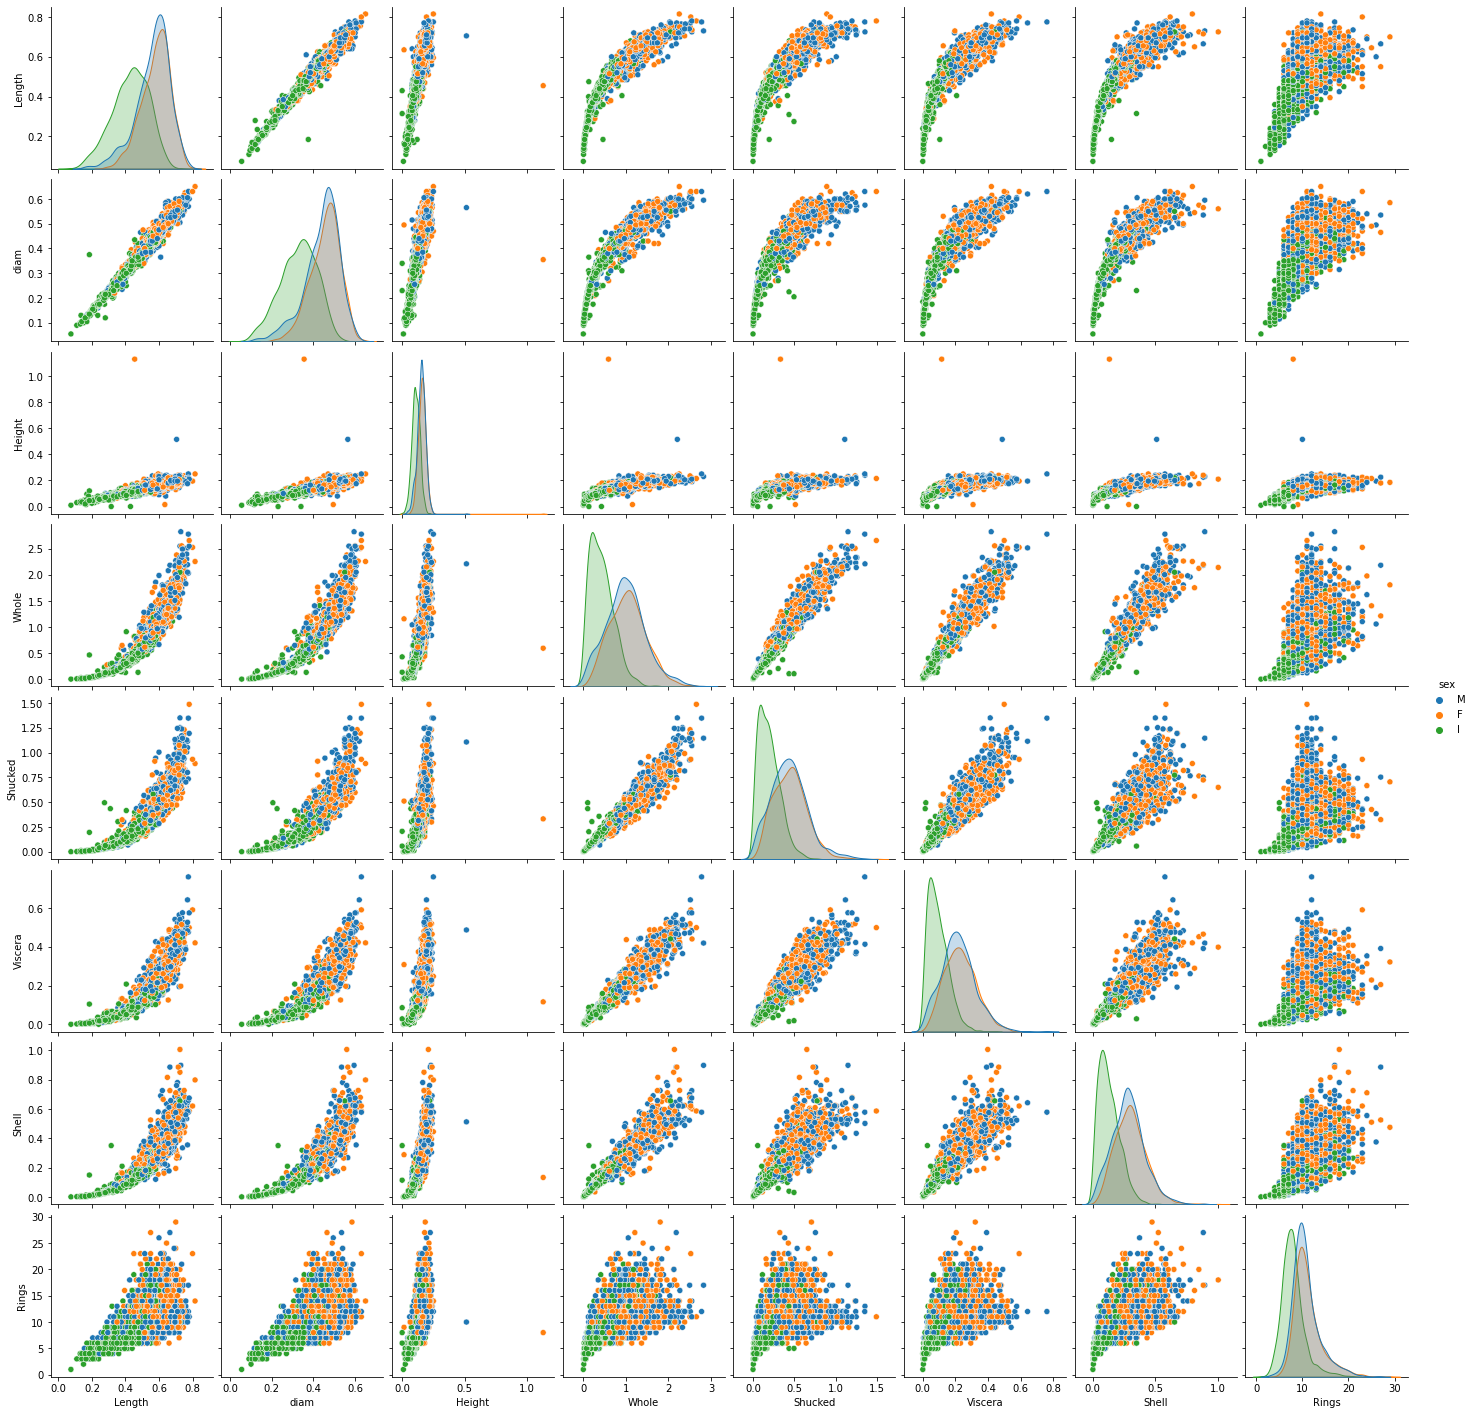

In [54]:
sns.pairplot(data,hue="sex")

# We remove the two high outliers for height and re plot the data, there is also outliers for viscera

In [57]:
data.drop(data.index[data["Height"] >0.4], inplace = True)
data.drop(data.index[data["Viscera"] >0.6], inplace = True)

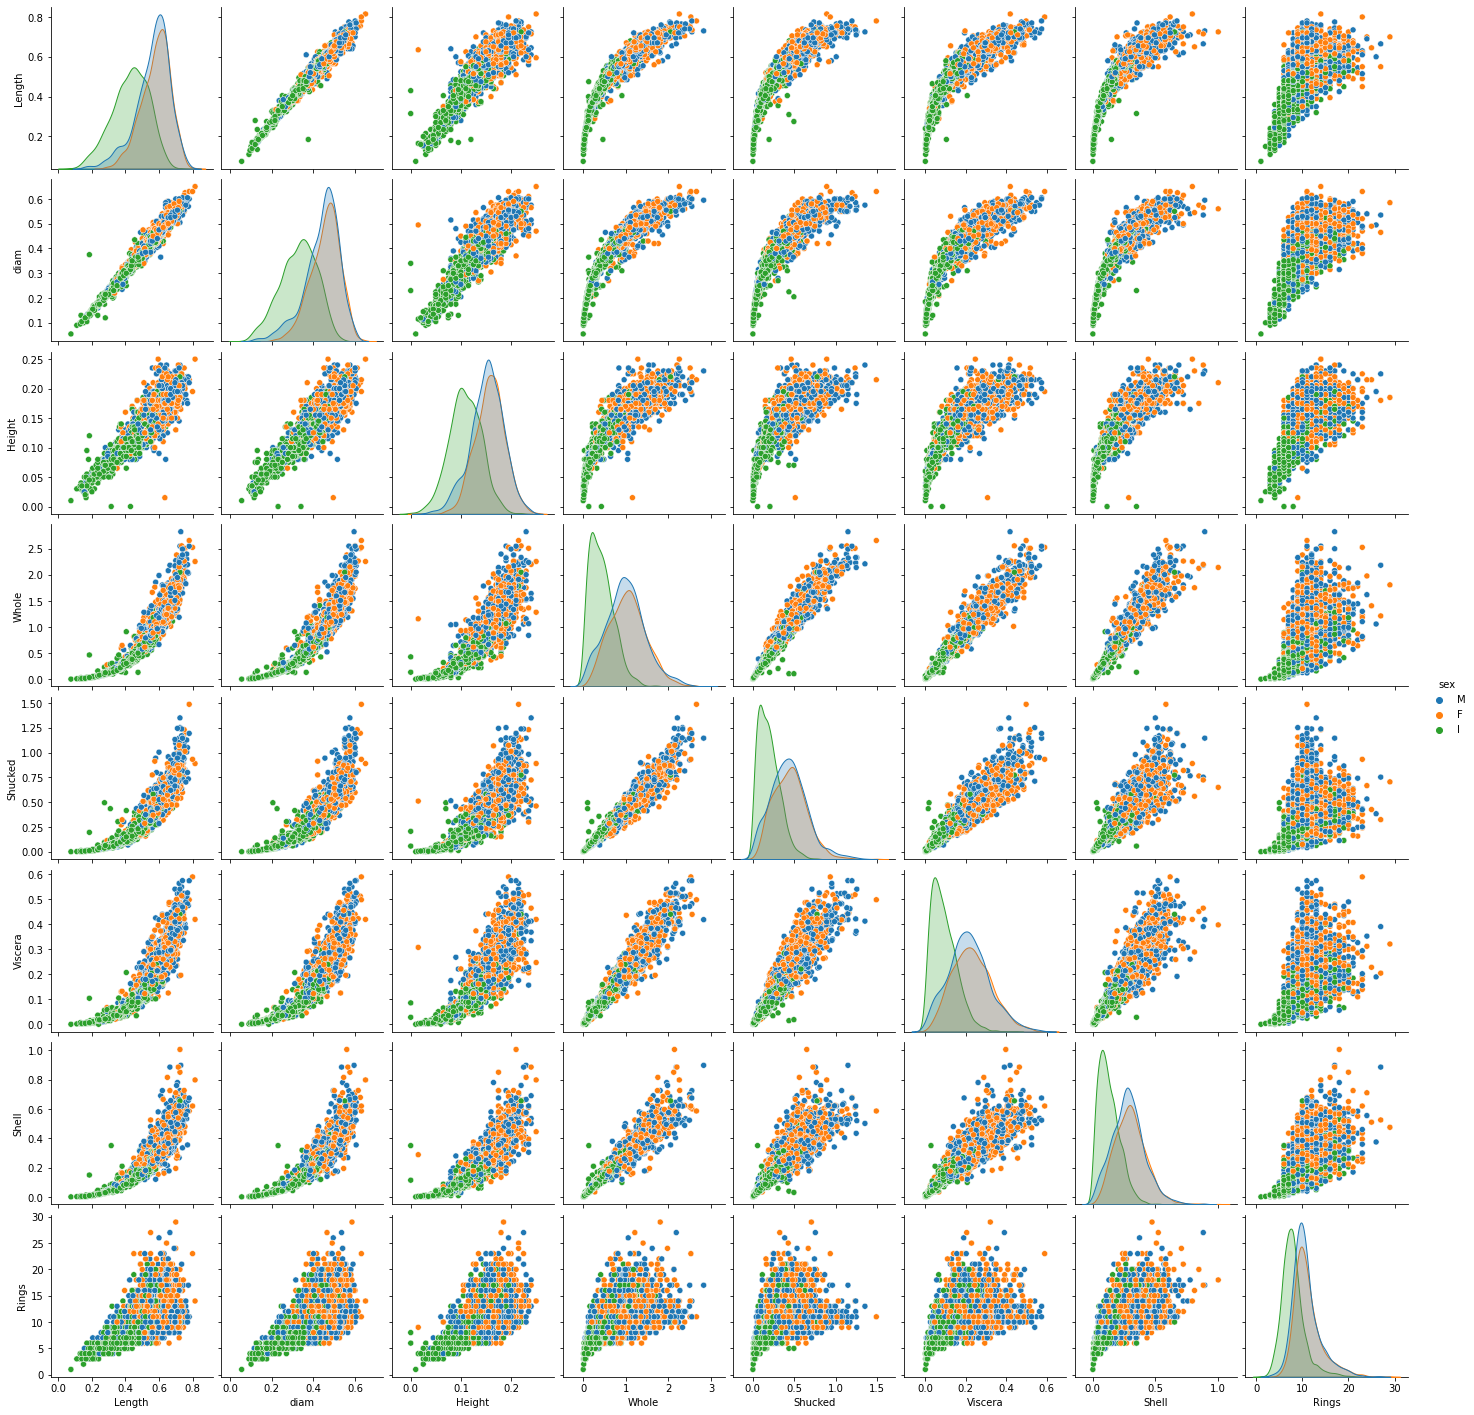

In [58]:
sns.pairplot(data,hue="sex")